<a href="https://colab.research.google.com/github/VCornejo10/Tarea_Regresion_Lineal/blob/main/S07-Linear-Models/Tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

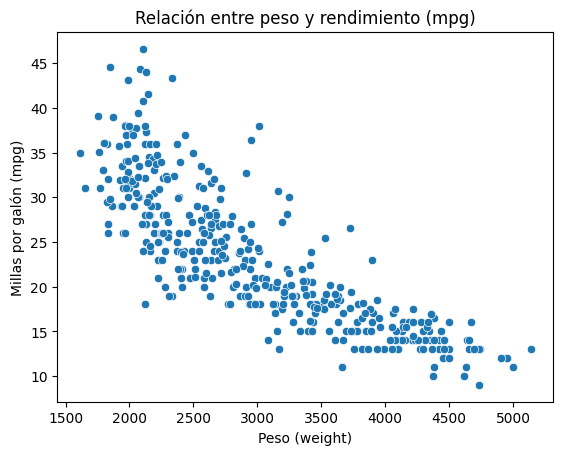

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Cargar dataset auto-mpg
df = sns.load_dataset("mpg")

# Mostrar primeras filas
df.head()

# Verificar valores nulos
df.isnull().sum()

# Eliminar filas con valores faltantes
df.dropna(inplace=True)

# Confirmar limpieza
df.isnull().sum()

# Relación entre peso del auto y rendimiento
sns.scatterplot(x='weight', y='mpg', data=df)
plt.title("Relación entre peso y rendimiento (mpg)")
plt.xlabel("Peso (weight)")
plt.ylabel("Millas por galón (mpg)")
plt.show()



2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos

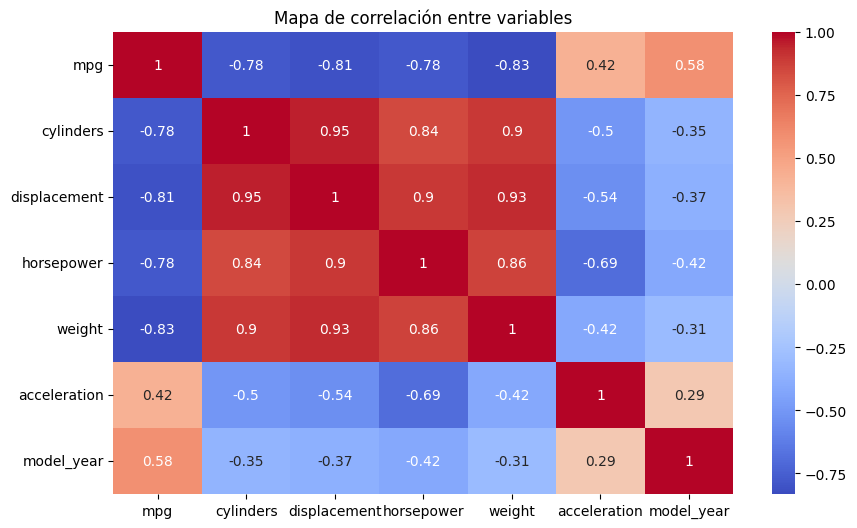

In [3]:
# Mapa de calor de correlación
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Mapa de correlación entre variables")
plt.show()


3) (1 punto) Construir y entrenar un modelo de regresion lineal


In [5]:
# Usamos la variable más correlacionada con mpg (por ej. weight)
X = df[['weight']]
y = df['mpg']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

In [6]:
# Predicción
y_pred = model.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 17.693388269545686
R-squared (R²): 0.6533466675646016


5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


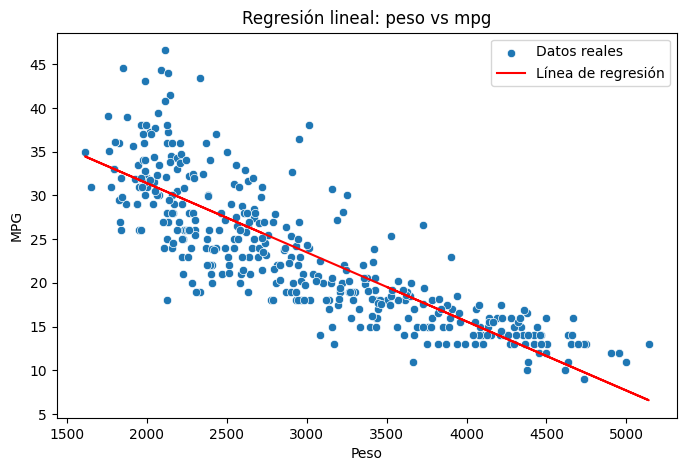

In [7]:
# Dibujar datos y línea de regresión
plt.figure(figsize=(8,5))
sns.scatterplot(x='weight', y='mpg', data=df, label='Datos reales')
plt.plot(df['weight'], model.predict(df[['weight']]), color='red', label='Línea de regresión')
plt.title("Regresión lineal: peso vs mpg")
plt.xlabel("Peso")
plt.ylabel("MPG")
plt.legend()
plt.show()


6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.